### Importação dos dados



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [3]:
faturamento_loja1 = loja['Preço'].sum()
faturamento_loja2 = loja2['Preço'].sum()
faturamento_loja3 = loja3['Preço'].sum()
faturamento_loja4 = loja4['Preço'].sum()

print(f'A soma das vendas da primeira loja foi de {faturamento_loja1:,.2f}')
print(f'A soma das vendas da segunda loja foi de {faturamento_loja2:,.2f}')
print(f'A soma das vendas da terceira loja foi de {faturamento_loja3:,.2f}')
print(f'A soma das vendas da quarta loja foi de {faturamento_loja4:,.2f}')


A soma das vendas da primeira loja foi de 1,534,509.12
A soma das vendas da segunda loja foi de 1,488,459.06
A soma das vendas da terceira loja foi de 1,464,025.03
A soma das vendas da quarta loja foi de 1,384,497.58


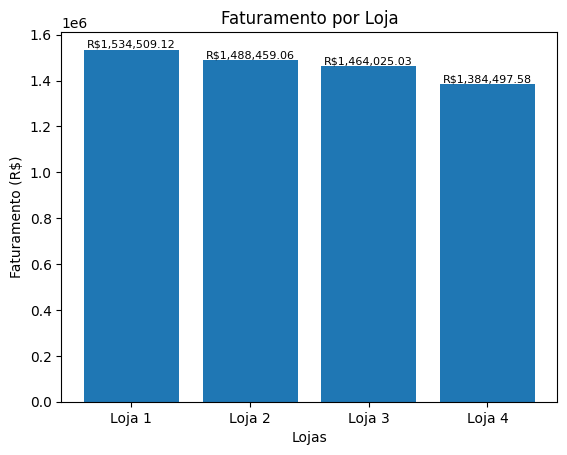

In [ ]:
import matplotlib.pyplot as plt



faturamentos = [faturamento_loja1, faturamento_loja2, faturamento_loja3, faturamento_loja4]
lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']

# Criar gráfico de barras
plt.bar(lojas, faturamentos)

# Títulos e rótulos
plt.title('Faturamento por Loja')
plt.xlabel('Lojas')
plt.ylabel('Faturamento (R$)')

for i, valor in enumerate(faturamentos):
    plt.text(i, valor, f'R${valor:,.2f}', ha='center', va='bottom', fontsize=8)

plt.show()




# 2. Vendas por Categoria

In [4]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    top_categorias = (
        df.groupby('Categoria do Produto')
          .size()
          .reset_index(name='Quantidade vendida')
          .sort_values(by='Quantidade vendida', ascending=False)
          .reset_index(drop=True)
          .head(3)
    )
    print(f'Loja {i} - Top 3 categorias mais vendidas:')
    print(top_categorias)

Loja 1 - Top 3 categorias mais vendidas:
  Categoria do Produto  Quantidade vendida
0               moveis                 465
1          eletronicos                 448
2           brinquedos                 324
Loja 2 - Top 3 categorias mais vendidas:
  Categoria do Produto  Quantidade vendida
0               moveis                 442
1          eletronicos                 422
2           brinquedos                 313
Loja 3 - Top 3 categorias mais vendidas:
  Categoria do Produto  Quantidade vendida
0               moveis                 499
1          eletronicos                 451
2           brinquedos                 315
Loja 4 - Top 3 categorias mais vendidas:
  Categoria do Produto  Quantidade vendida
0               moveis                 480
1          eletronicos                 451
2           brinquedos                 338


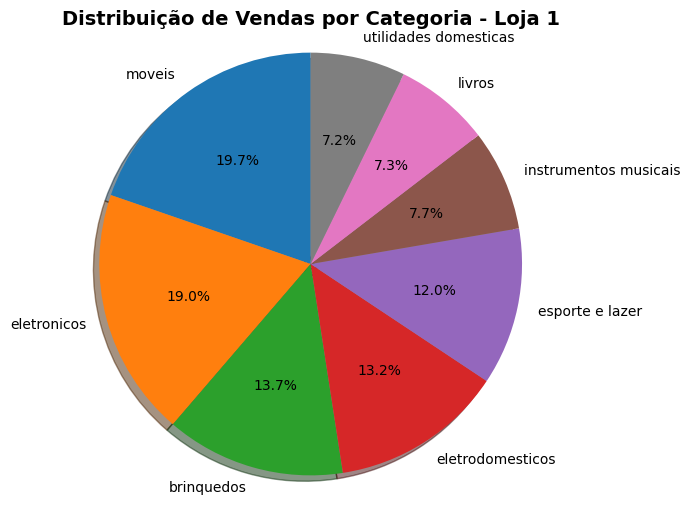

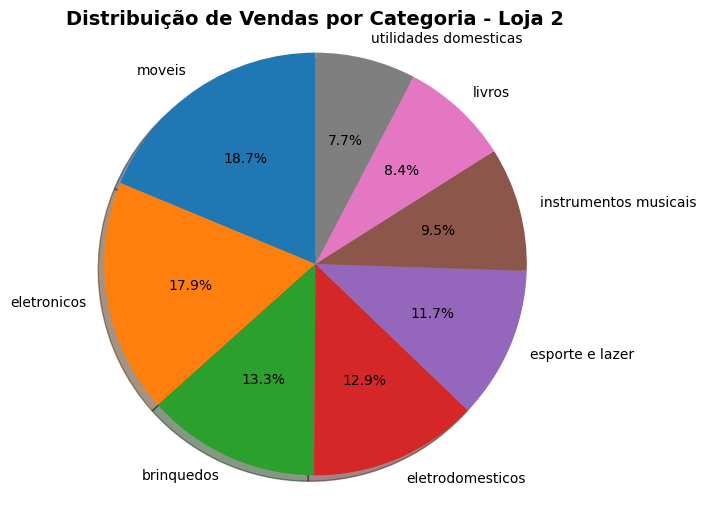

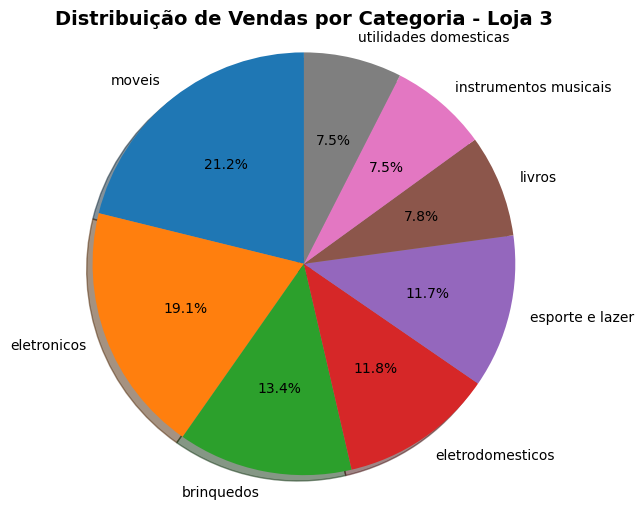

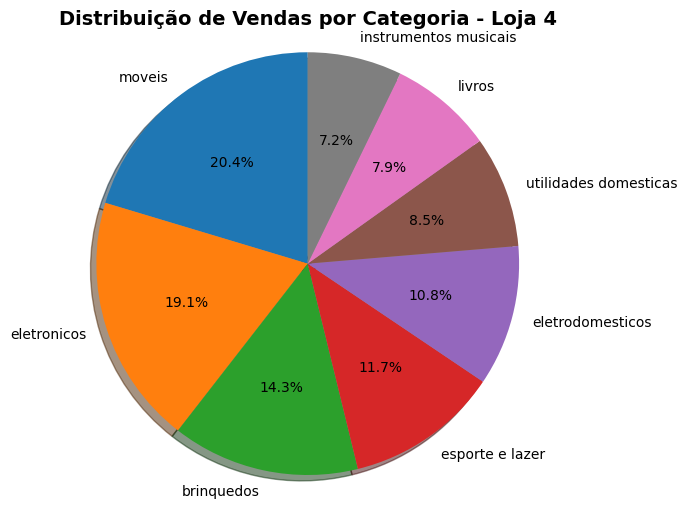

In [ ]:
import matplotlib.pyplot as plt

# Função pra gerar o gráfico de pizza de cada loja
def grafico_pizza_vendas(df, titulo):
    vendas_categoria = df['Categoria do Produto'].value_counts()

    plt.figure(figsize=(6,6))
    plt.pie(vendas_categoria,
            labels=vendas_categoria.index,
            autopct='%1.1f%%',
            startangle=90,
            shadow=True)
    plt.title(titulo, fontsize=14, fontweight='bold')
    plt.axis('equal')
    plt.show()

# Gerar um gráfico pra cada loja
grafico_pizza_vendas(loja, 'Distribuição de Vendas por Categoria - Loja 1')
grafico_pizza_vendas(loja2, 'Distribuição de Vendas por Categoria - Loja 2')
grafico_pizza_vendas(loja3, 'Distribuição de Vendas por Categoria - Loja 3')
grafico_pizza_vendas(loja4, 'Distribuição de Vendas por Categoria - Loja 4')

# 3. Média de Avaliação das Lojas


In [5]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    media_avaliacao = df['Avaliação da compra'].mean()
    print(f'Loja {i} - Média de avaliação: {media_avaliacao:.2f}')

Loja 1 - Média de avaliação: 3.98
Loja 2 - Média de avaliação: 4.04
Loja 3 - Média de avaliação: 4.05
Loja 4 - Média de avaliação: 4.00


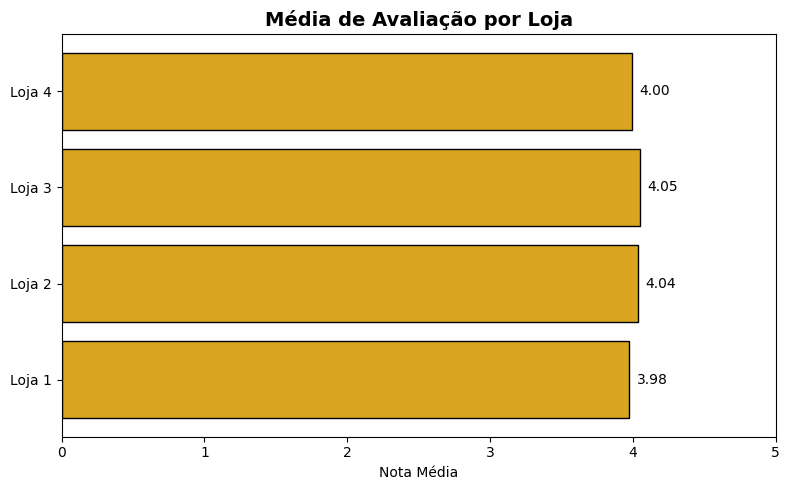

In [ ]:

import matplotlib.pyplot as plt

# Lista com os DataFrames das lojas
lojas = [loja, loja2, loja3, loja4]

plt.figure(figsize=(8,5))
plt.barh(nomes_lojas, medias_avaliacao, color='goldenrod', edgecolor='black')
plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Nota Média')
plt.xlim(0, 5)

for i, v in enumerate(medias_avaliacao):
    plt.text(v + 0.05, i, f'{v:.2f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [7]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    top_produtos = (
        df.groupby('Produto')
        .size()
        .reset_index(name='Quantidade vendida')
        .sort_values(by='Quantidade vendida', ascending=False)
        .reset_index(drop=True)
        .head(5)
    )
    print(f'Loja {i} - Produtos mais vendidos:')
    print(top_produtos)


Loja 1 - Produtos mais vendidos:
              Produto  Quantidade vendida
0       TV Led UHD 4K                  60
1         Micro-ondas                  60
2       Guarda roupas                  60
3  Secadora de roupas                  58
4    Blocos de montar                  56
Loja 2 - Produtos mais vendidos:
                    Produto  Quantidade vendida
0  Iniciando em programação                  65
1               Micro-ondas                  62
2                   Bateria                  61
3                    Violão                  58
4                  Pandeiro                  58
Loja 3 - Produtos mais vendidos:
           Produto  Quantidade vendida
0    Kit banquetas                  57
1   Mesa de jantar                  56
2        Cama king                  56
3           Cômoda                  55
4  Jogo de panelas                  55
Loja 4 - Produtos mais vendidos:
                   Produto  Quantidade vendida
0                 Cama box                  62


In [8]:
lojas = [loja, loja2, loja3, loja4]

for i, df in enumerate(lojas, start=1):
    low_produtos = (
        df.groupby('Produto')
        .size()
        .reset_index(name='Quantidade vendida')
        .sort_values(by='Quantidade vendida', ascending=True)
        .reset_index(drop=True)
        .head(5)
    )
    print(f'Loja {i} - Produtos menos vendidos:')
    print(low_produtos)

Loja 1 - Produtos menos vendidos:
                       Produto  Quantidade vendida
0                 Celular ABXY                  33
1                      Headset                  33
2            Panela de pressão                  35
3                     Pandeiro                  36
4  Ciência de dados com python                  39
Loja 2 - Produtos menos vendidos:
             Produto  Quantidade vendida
0  Jogo de tabuleiro                  32
1         Impressora                  34
2     Mesa de jantar                  34
3           Poltrona                  35
4     Fone de ouvido                  37
Loja 3 - Produtos menos vendidos:
            Produto  Quantidade vendida
0  Blocos de montar                  35
1     Jogo de copos                  36
2       Micro-ondas                  36
3           Mochila                  36
4          Guitarra                  38
Loja 4 - Produtos menos vendidos:
                       Produto  Quantidade vendida
0                    

# 5. Frete Médio por Loja

In [6]:
frete_loja1 = loja['Frete'].mean()
frete_loja2 = loja2['Frete'].mean()
frete_loja3 = loja3['Frete'].mean()
frete_loja4 = loja4['Frete'].mean()

print("Frete médio por loja:")
print(f"Loja 1: R$ {frete_loja1:,.2f}")
print(f"Loja 2: R$ {frete_loja2:,.2f}")
print(f"Loja 3: R$ {frete_loja3:,.2f}")
print(f"Loja 4: R$ {frete_loja4:,.2f}")

Frete médio por loja:
Loja 1: R$ 34.69
Loja 2: R$ 33.62
Loja 3: R$ 33.07
Loja 4: R$ 31.28


Loja 1 - Frete médio: R$ 34.69
Loja 2 - Frete médio: R$ 33.62
Loja 3 - Frete médio: R$ 33.07
Loja 4 - Frete médio: R$ 31.28


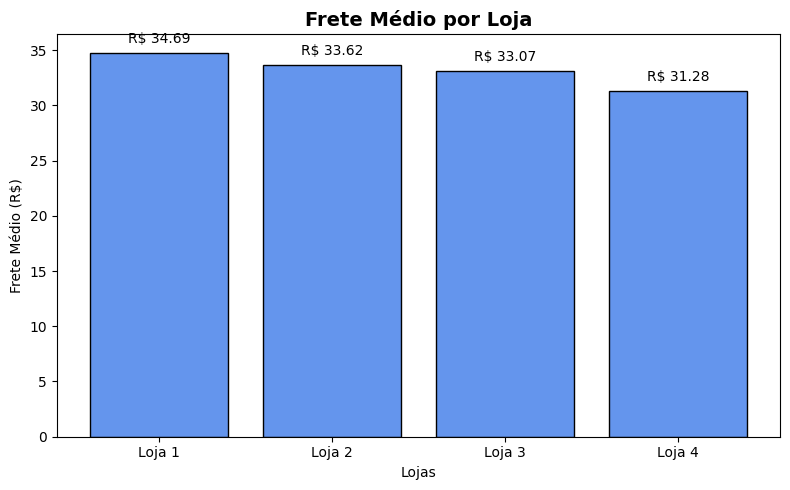

In [ ]:
import matplotlib.pyplot as plt


lojas = [loja, loja2, loja3, loja4]


fretes_medios = [df['Frete'].mean() for df in lojas]
nomes_lojas = [f'Loja {i}' for i in range(1, len(lojas) + 1)]


for i, frete in enumerate(fretes_medios, start=1):
    print(f'Loja {i} - Frete médio: R$ {frete:.2f}')

# Cria o gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(nomes_lojas, fretes_medios, color='cornflowerblue', edgecolor='black')
plt.title('Frete Médio por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas')
plt.ylabel('Frete Médio (R$)')

# Adiciona os valores acima das barras
for i, valor in enumerate(fretes_medios):
    plt.text(i, valor + (valor * 0.02), f'R$ {valor:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

## RELATÓRIO

O objetivo desse relatório, é analisar com base nos números as 4 lojas que o Senhor João possui, e com esses números ajudá-lo a tomar a melhor decisão para poder fazer o seu próximo investimento com clareza.

## Faturamento

Em termos de faturamento uma loja se destaca mais do que as outras positivamente, que é a Loja 1, a Loja 4 se destaca de forma negativa, tendo o menor lucro entre as 4 lojas.

Loja 1: 1,534,509.12
Loja 2: 1,488,459.06
Loja 3: 1,464,025.03
Loja 4: 1,384,497.58

## Mais Vendidos

As categorias mais vendidas são móveis, eletrônicos e brinquedos, nessa ordem, nas 4 lojas, mostrando que todas as lojas possui um portfólio de itens que atende as demandas da população enquanto uma mini rede de varejo vende móveis, eletrodomésticos, entre outras coisas.

## Avaliação das Lojas

Loja 1 - Média de avaliação: 3.98
Loja 2 - Média de avaliação: 4.04
Loja 3 - Média de avaliação: 4.05
Loja 4 - Média de avaliação: 4.00

## Frete Médio

Loja 1 - Frete médio: 34.69
Loja 2 - Frete médio: 33.62
Loja 3 - Frete médio: 33.07
Loja 4 - Frete médio: 31.28

Levando em consideração tanto o frete médio quanto a avaliação das lojas podemos chegar a conclusão que é fundmaental a manutenção das Lojas 2 e 3, são lojas solidas e estáveis, sendo a loja 3 com o faturamento ligeiramente maior, já a loja 1 ela possui o maior volume bruto e maior investimento logístico já que o frete é maior que o das outras lojas, porém segue sendo lucrativa justamente pelo grande volume de vendas, olhando a Loja 4, ela é a menos lucrativa, embora ela tenha a maior nota e o frete menor, isso não se converte no volume de vendas, fazendo com que ela não tenha um retorno a longo prazo, não parece ter sinal de recuperação a longo prazo. O ideal era melhorar e otimizar as outras lojas, trabalhar para que as notas sejam maiores investindo em um bom atendimento e no pós venda.

A loja a ser vendida é a Loja 4.